# Exercise 2: Sinusoids and the DFT
Doing this exercise you will get a better understanding of the basic elements and operations that take place in the Discrete Fourier Transform (DFT). There are five parts: 1) Generate a sinusoid, 2) Generate a complex sinusoid, 3) Implement the DFT, 4) Implement the IDFT, and 5) Compute the magnitude spectrum of an input sequence.

## Relevant Concepts
A real sinusoid in discrete time domain can be expressed by:

 
where,  is the array of real values of the sinusoid,  is an integer value expressing the time index,  is the amplitude value of the sinusoid,  is the frequency value of the sinusoid in Hz,  is the sampling period equal to , fs is the sampling frequency in Hz, and  is the initial phase of the sinusoid in radians.

A complex sinusoid in discrete time domain can be expressed by:

 
where, 
 is the array of complex values of the sinusoid,  is an integer value expressing the time index,  is the amplitude value of the sinusoid,  is the complex exponential number,  is the frequency of the sinusoid in radians per second (equal to ),  is the sampling period equal , fs is the sampling frequency in Hz and  is the initial phase of the sinusoid in radians.

The  point DFT of a sequence of real values  (a sound) can be expressed by:

 
where  is an integer value expressing the discrete time index,  is an integer value expressing the discrete frequency index, and  is the length of the DFT.

The IDFT of a spectrum  of length  can be expressed by:

 
 
where,  is an integer value expressing the discrete time index,  is an integer value expressing the discrete frequency index, and  is the length of the spectrum .

The magnitude of a complex spectrum  is obtained by taking its absolute value: 

## Part 1 - Generate a sinusoid
The function gen_sine() should generate a real sinusoid (use np.cos()) given its amplitude A, frequency f (Hz), initial phase phi (radians), sampling rate fs (Hz) and duration t (seconds).

All the input arguments to this function (A, f, phi, fs and t) are real numbers such that A, t and fs are positive, and fs > 2*f to avoid aliasing. The function should return a numpy array x of the generated sinusoid.

Use the function cos of the numpy package to compute the sinusoidal values.

In [2]:
import numpy as np
def genSine(A, f, phi, fs, t):
    n = np.arange(0,t,1/fs)
    x = A*np.cos(2*np.pi*f*n + phi)
    return x

If you use A=1.0, f = 10.0, phi = 1.0, fs = 50 and t = 0.1 as input to the function gen_sine() the output numpy array should be:

        array([ 0.54030231, -0.63332387, -0.93171798,  0.05749049,  0.96724906])
To generate a sinewave that you can hear, it should be longer and with a higher sampling rate. For example you can use A=1.0, f = 440.0, phi = 1.0, fs = 5000 and t = 0.5. To play it import the Ipython.display package and use ipd.display(ipd.Audio(data=x, rate=fs)).

In [3]:
import IPython.display as ipd
import matplotlib.pyplot as plt
def gen_Sine(A, f, phi, fs, t):
    n = np.arange(0,t,1/fs)
    x = A*np.cos(2*np.pi*f*n + phi)    
    return x
print(gen_Sine(1.0,10.0,1.0,50.0,0.1))


[ 0.54030231 -0.63332387 -0.93171798  0.05749049  0.96724906]


In [6]:
import IPython.display as ipd
import matplotlib.pyplot as plt

def gen_Sine(A, f, phi, fs, t):
    n = np.arange(0,t,1/fs)
    A = 1.0
    f = 440.0
    phi = 1.0
    fs = 5000
    t = 0.5
    x = A*np.cos(2*np.pi*f*n + phi)
    return x
plt.plot(x)
fs= 5000
ipd.display(ipd.Audio(data=x, rate=fs))

NameError: name 'x' is not defined

# Part 2 - Generate a complex sinusoid
The gen_complex_sine() function should generate the complex sinusoid that is used in DFT computation of length N (samples), corresponding to the frequency index k. [Note that in the DFT we use the conjugate of this complex sinusoid.]

The amplitude of such a complex sinusoid is 1, the length is N, and the frequency in radians is 2*pi*k/N.

The input arguments to the function are two positive integers, k and N, such that k < N-1. The function should return c_sine, a numpy array of the complex sinusoid. Use the function exp() of the numpy package to compute the complex sinusoidal values.

In [119]:
# E2 - 2.1: Complete function the function gen_complex_sine()

def gen_complex_sine(k, N):
    """Generate one of the complex sinusoids used in the DFT from its frequency index and the DFT lenght.
    
    Args:
        k (integer): frequency index of the complex sinusoid of the DFT
        N (integer) = length of complex sinusoid, DFT length, in samples
        
    Returns:
        np.array: array with generated complex sinusoid (length N)
        
    """
    n = np.arange(0,N)
    complex_sin = np.array([np.exp(-2j * np.pi * k * n / N) for n in range])
    return complex_sin

If you run the function gen_complex_sine() using k=1 and N=5, it should return the following numpy array:

    array([ 1. + 0.j,  0.30901699 + 0.95105652j, -0.80901699 + 0.58778525j, -0.80901699 - 0.58778525j, 0.30901699 - 0.95105652j])

/Users/sofiavallejo/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


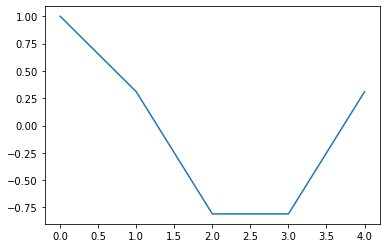

In [127]:
# E2 - 2.2: Call gen_complex_sine() with the values suggested above and plot the real and imaginary parts of the 
# output complex sinusoid

def gen_complex_sine(k, N):
    n = np.arange(N)/N
    complex_sin = np.exp(-1j*2*np.pi*k*n)
    return complex_sin
k = 1.0
N = 5.0
complex_sin = gen_complex_sine(k=k,N=N)
plt.plot(complex_sin)

# Part 3 - Implement the discrete Fourier transform (DFT)
The function dft() should implement the discrete Fourier transform (DFT) equation given above. Given a sequence x of length N, the function should return its spectrum of length N with the frequency indexes ranging from 0 to N-1.

The input argument to the function is a numpy array x and the function should return a numpy array X, the DFT of x.

In [145]:
# E2 - 3.1: Complete the function dft()

def dft(x):
    """Compute the DFT of a signal.
    
    Args:
        x (numpy array): input sequence of length N
        
    Returns:
        np.array: N point DFT of the input sequence x
    """
    X = []
    for k in np.arange(x.size):
        sk = gen_complex_sine(float(k),float(x.size))
        X = np.append(X,np.sum(x*sk))
    return X

If you run dft() using as input x = np.array([1, 2, 3, 4]), the function shoulds return the following numpy array:

    array([10.0 + 0.0j,  -2. +2.0j,  -2.0 - 9.79717439e-16j, -2.0 - 2.0j])
Note that you might not get an exact 0 in the output because of the small numerical errors due to the limited precision of the data in your computer. Usually these errors are of the order 1e-15 depending on your machine.

[10.+0.00000000e+00j -2.+2.00000000e+00j -2.-9.79717439e-16j
 -2.-2.00000000e+00j]


/Users/sofiavallejo/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


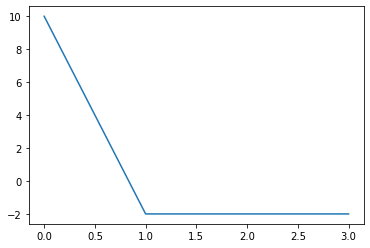

In [153]:
# E2 - 3.2: Call dft() with the values suggested above and plot the real and imaginary parts of output spectrum
x = np.array([1, 2, 3, 4])
X1 = dft(x)
print (X1)
plt.plot(X1)

# Part 4 - Implement the inverse discrete Fourier transform (IDFT)
The function idft() should implement the inverse discrete Fourier transform (IDFT) equation given above. Given a frequency spectrum X of length N, the function should return its IDFT x, also of length N. Assume that the frequency index of the input spectrum ranges from 0 to N-1.

The input argument to the function is a numpy array X of the frequency spectrum and the function should return a numpy array of the IDFT of X.

Remember to scale the output appropriately.

In [173]:
# E2 - 4.1: Complete the function idft()

def idft(X):
    """Compute the inverse-DFT of a spectrum.
    
    Args:
        X (np.array): frequency spectrum (length N)
        
    Returns:
        np.array: N point IDFT of the frequency spectrum X
        
    """
    N = len(X)
    kv = np.arange(0,N)
    y = np.array([])
    for n in range(N):
    	s = np.exp(1j * 2 * np.pi * n / N * np.arange(N))
    	y = np.append(y, 1.0/N * sum(X*s))
    return y

If you run idft() with the input X = np.array([1, 1, 1, 1]), the function should return the following numpy array:

    array([  1.00000000e+00 +0.00000000e+00j,   -4.59242550e-17 +5.55111512e-17j,   0.00000000e+00 +6.12323400e-17j,   8.22616137e-17 +8.32667268e-17j])
Notice that the output numpy array is essentially [1, 0, 0, 0]. Instead of exact 0 we get very small numerical values of the order of 1e-15, which can be ignored. Also, these small numerical errors are machine dependent and might be different in your case.

In addition, an interesting test of the IDFT function can be done by providing the output of the DFT of a sequence as the input to the IDFT. See if you get back the original time domain sequence.

[ 1.00000000e+00+0.00000000e+00j -4.59242550e-17+5.55111512e-17j
  0.00000000e+00+6.12323400e-17j  8.22616137e-17+8.32667268e-17j]
[1.-5.55111512e-16j 2.-3.33066907e-16j 3.-1.11022302e-16j
 4.+3.88578059e-16j]


/Users/sofiavallejo/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/sofiavallejo/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


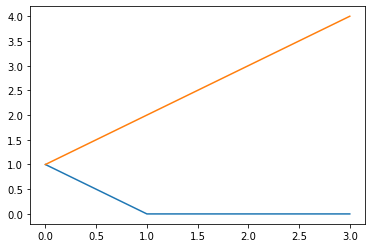

In [213]:
X = np.array([1,1,1,1])
x = idft(X)
print (x)

x1 = idft(X1)
print (x1)
plt.plot(x)
plt.plot(x1)

# Part 5 - Compute the magnitude spectrum
The function gen_mag_spectrum() should compute the magnitude spectrum of an input sequence x of length N. The function should return an N point magnitude spectrum with frequency index ranging from 0 to N-1.

The input argument to the function is a numpy array x and the function should return a numpy array of the magnitude spectrum of x.

In [167]:
# E2 - 5.1: Complete the function gen_mag_spec()

def gen_mag_spec(x):
    """Compute magnitude spectrum of a signal.
    
    Args:
        x (np.array): input sequence of length N
        
    Returns:
        np.array: magnitude spectrum of the input sequence x (length N)
        
    """
    X = np.array([])
    N = len(x)
    for k in range(N):
        s = np.exp(1j * 2 * np.pi * k / N * np.arange(N))
        X = np.append(X, sum(x*np.conjugate(s)))
    return 20*np.log10(abs(X))

[10.          2.82842712  2.          2.82842712]


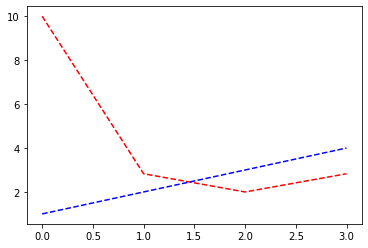

In [203]:
def gen_mag_spec(x): 
    N = x.shape[0]
    nv = np.arange(0, N)
    kv = np.arange(0, N)

    X = np.array([])

    for k in kv:
        s = np.exp(1j * 2 * np.pi * k / N * nv)
        X = np.append(X, sum(x*np.conjugate(s)))

    return np.abs(X)

x = np.array([1, 2, 3, 4])
print (gen_mag_spec(x))
plt.plot(gen_mag_spec(x),"r--")
plt.plot(x,"b--")